In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from utils import perform_preprocessing


In [3]:
train, test, target, test_id = perform_preprocessing(options={"pca": False})

Step #1. train:  (1460, 81)
Step #1. test:  (1459, 80)
Step #2.0. train:  (1460, 80)
Step #2.0. test:  (1459, 79)
Features to be dropped: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
Step #2.1. train:  (1460, 75)
Step #2.1. test:  (1459, 74)
Outlier features: ['BsmtHalfBath', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF']
Step #2.2. train:  (1460, 66)
Step #2.2. test:  (1459, 65)
Step #3. train:  (1460, 66)
Step #3. test:  (1459, 65)


d:\Programming\Python\House Prise Kaggle\utils.py:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series(index=df.columns)


Step #4. train:  (945, 66)
Step #4. test:  (1459, 65)
Step #5. train:  (945, 65)
Step #5. test:  (1459, 65)
Step #6.1. train:  (945, 239)
Step #6.1. test:  (1459, 246)
Step #6.2. train:  (945, 239)
Step #6.2. test:  (1459, 239)
Train missing values:  0
Test missing values:  11672
Train missing values:  0
Test missing values:  0
Step #7. train:  (945, 239)
Step #7. test:  (1459, 239)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(756, 239) (189, 239) (756,) (189,)


# Modelling

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential([
    Input(shape=X_train.shape[1]),  # , batch_size=8
    Dense(1000, activation="relu"),
    Dense(5000, activation="relu"),
    Dense(1000, activation="relu"),
    Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              240000    
                                                                 
 dense_1 (Dense)             (None, 5000)              5005000   
                                                                 
 dense_2 (Dense)             (None, 1000)              5001000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 10,247,001
Trainable params: 10,247,001
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(train, target, validation_split=0.2, epochs=50)

Epoch 1/50
24/24 [==============================] - 2s 56ms/step - loss: 28744224768.0000 - mean_squared_error: 28744224768.0000 - val_loss: 22482425856.0000 - val_mean_squared_error: 22482425856.0000
Epoch 2/50
24/24 [==============================] - 1s 47ms/step - loss: 7931080704.0000 - mean_squared_error: 7931080704.0000 - val_loss: 1791825664.0000 - val_mean_squared_error: 1791825664.0000
Epoch 3/50
24/24 [==============================] - 1s 52ms/step - loss: 1128698752.0000 - mean_squared_error: 1128698752.0000 - val_loss: 1320790912.0000 - val_mean_squared_error: 1320790912.0000
Epoch 4/50
24/24 [==============================] - 1s 48ms/step - loss: 451133728.0000 - mean_squared_error: 451133728.0000 - val_loss: 1118974720.0000 - val_mean_squared_error: 1118974720.0000
Epoch 5/50
24/24 [==============================] - 1s 50ms/step - loss: 297141600.0000 - mean_squared_error: 297141600.0000 - val_loss: 1090209536.0000 - val_mean_squared_error: 1090209536.0000
Epoch 6/50
24/2

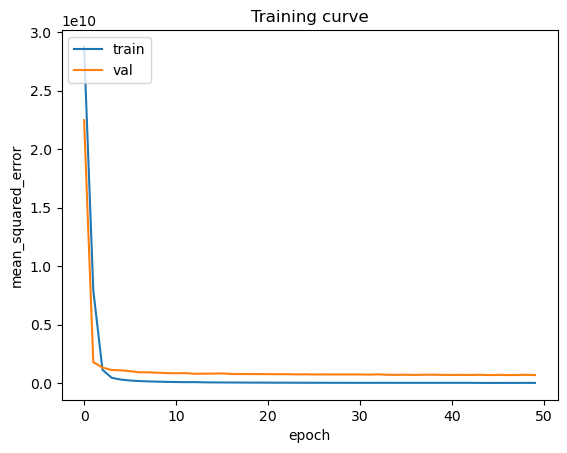

In [7]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Training curve')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()